# Análise OD-2023
## Overview
As seguintes análises foram feitas:
- **Análise comparativa dos meios de transporte da OD 23** (quais os meios mais/menos utilizados) 
- **Caracterização do Perfil do Pedestre - perfil demográfico**
  - Distribuição por sexo
  - Distribuição por idade
  - Distribuição por grau de instrução
  - Distribuição por condição de atividade
  - Distribuição por renda individual
  - Relação entre renda individual e grau de instrução
- **Análise Específica do Comportamento como Pedestre**
  - Razões para caminhar
  - Motivos de viagem (destino)
- **Padrões de deslocamento**
  - Distribuição de distâncias percorridas
  - Relação entre distância e motivo da viagem (destino)

### TODO
- Comparar região metropolitana e municipal (verificar se coordenadas de origem e destino estão dentro da zona municipal)

### Sumário das análises feitas
**Sumário - Análise do perfil demográfico dos pedestres**
1. Distribuição por Sexo
- *Feminino*: 56,02%
- *Masculino*: 43,92%

2. Distribuição por Faixa Etária
- Idade média: 32,5 ano
- Mediana (Q2): 31 anos
- Faixa etária predominante: *31 a 50 anos*, com 28,57%
- Segunda maior faixa: *0 a 12 anos*, com 24,10%
- Menor faixa: *65 anos ou mais*, representando apenas 3,58%

3. Distribuição por Raça/Cor
- *Branca*: 49,01% (maior proporção)
- *Parda*: 38,96%
- *Preta*: 10,03%
- *Amarela*: 1,21%
- *Indígena*: 0,29% (menor proporção)

4. Distribuição por Grau de Instrução
- Faixa predominante: *Ensino médio completo ou superior incompleto* (29,06%)
- Faixa menos representada: *Superior completo* (11,92%)

5. Distribuição por Condição de Atividade
- Principal grupo: Pessoas com trabalho regular (37,73%)
- Segundo maior grupo: Estudantes (33,48%)

6. Distribuição da Renda Individual
- Renda média: R$ 1.643,54
- 3º quartil (Q3): R$ 1.900,00

7. Renda Individual Média por Grau de Instrução (Q95)
- *Superior completo*: R$ 7.203,04
- *Médio completo / Superior incompleto*: R$ 1.718,64

**Sumário - Análise comportamental do pedestre**
1. Distribuição dos Motivos para a Escolha do Deslocamento a Pé
- Motivo mais frequente: *Pequena distância* (93,75%)
- Segundo motivo mais frequente: *Condução cara* (2,33%)

2. Distribuição dos Motivos de Destino dos Pedestres
- Destino mais comum: *Residência* (47,39%)
- Segundo mais comum: *Educação* (30,31%)
- Terceiro mais comum: *Trabalho* (14,71%)

3. Distribuição da Distância Percorrida pelos Pedestres
- Faixa mais frequente: *Menor que 500 metros* (55,42%)
- Segunda faixa mais frequente: *Entre 500m e 1000m* (28,44%)

4. Relação entre a Distância Percorrida e o Motivo da Viagem
- Maior distância média: *Procurar emprego* (~1300 metros)
- Menor distância média: *Refeição* (~510 metros)


In [503]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils.models import meios_transporte, criterio_br

In [504]:
data_path = "../data/OD/OD-2023/od23_all.csv"
df = pd.read_csv(data_path)
# df.columns

In [505]:
df.head()

,ZONA,MUNI_DOM,CO_DOM_X,CO_DOM_Y,ID_DOM,F_DOM,FE_DOM,DOM,CD_ENTRE,DATA,...,TIPVG,TP_ESAUTO,VL_EST,PE_BICI,TP_ESTBICI,PROP_BICI,DISTANCIA,ID_ORDEM,HORA_SAIDA,HORA_CHEG
0,1,36,-23.550855,-46.629023,0,1,32.34,1,1,17/04/2024,...,4,0,0,7,2,1,1518.600013,1,11:00:00,11:30:00
1,1,36,-23.550855,-46.629023,100001,0,32.34,1,1,17/04/2024,...,4,0,0,9,2,1,1518.600013,2,15:30:00,16:00:00
2,1,36,-23.550855,-46.629023,100002,1,32.34,2,1,17/04/2024,...,2,0,0,0,0,0,8350.069281,3,18:00:00,18:30:00
3,1,36,-23.550855,-46.629023,100002,0,32.34,2,1,17/04/2024,...,2,0,0,0,0,0,8350.069281,4,23:00:00,23:25:00
4,1,36,-23.550855,-46.629023,100002,0,32.34,2,1,17/04/2024,...,2,0,0,0,0,0,10346.375791,5,13:00:00,13:30:00


## Comparação dos meios de transporte (OD-2023)

Colunas importantes:
- FE_VIA: fator de viagem
- MODOPRIN: modo principal de viagem da pessoa

In [506]:
print(meios_transporte)

{1: 'Metrô', 2: 'Trem', 3: 'Monotrilho', 4: 'Ônibus/micro-ônibus/van do município de São Paulo', 5: 'Ônibus/micro-ônibus/van de outros municípios', 6: 'Ônibus/micro-ônibus/van metropolitano', 7: 'Transporte Fretado', 8: 'Transporte Escolar', 9: 'Dirigindo Automóvel', 10: 'Passageiro de Automóvel', 11: 'Táxi Convencional', 12: 'Táxi não Convencional / aplicativo', 13: 'Dirigindo Moto', 14: 'Passageiro de Moto', 15: 'Passageiro de Mototáxi', 16: 'Bicicleta', 17: 'A Pé', 18: 'Outros'}


In [507]:
meios_fatorexp = df.groupby('MODOPRIN')['FE_VIA'].sum()
meios_fatorexp = meios_fatorexp.sort_values()

In [508]:
meios_fatorexp.index = meios_fatorexp.index.map(lambda x: meios_transporte.get(x, "Desconhecido"))

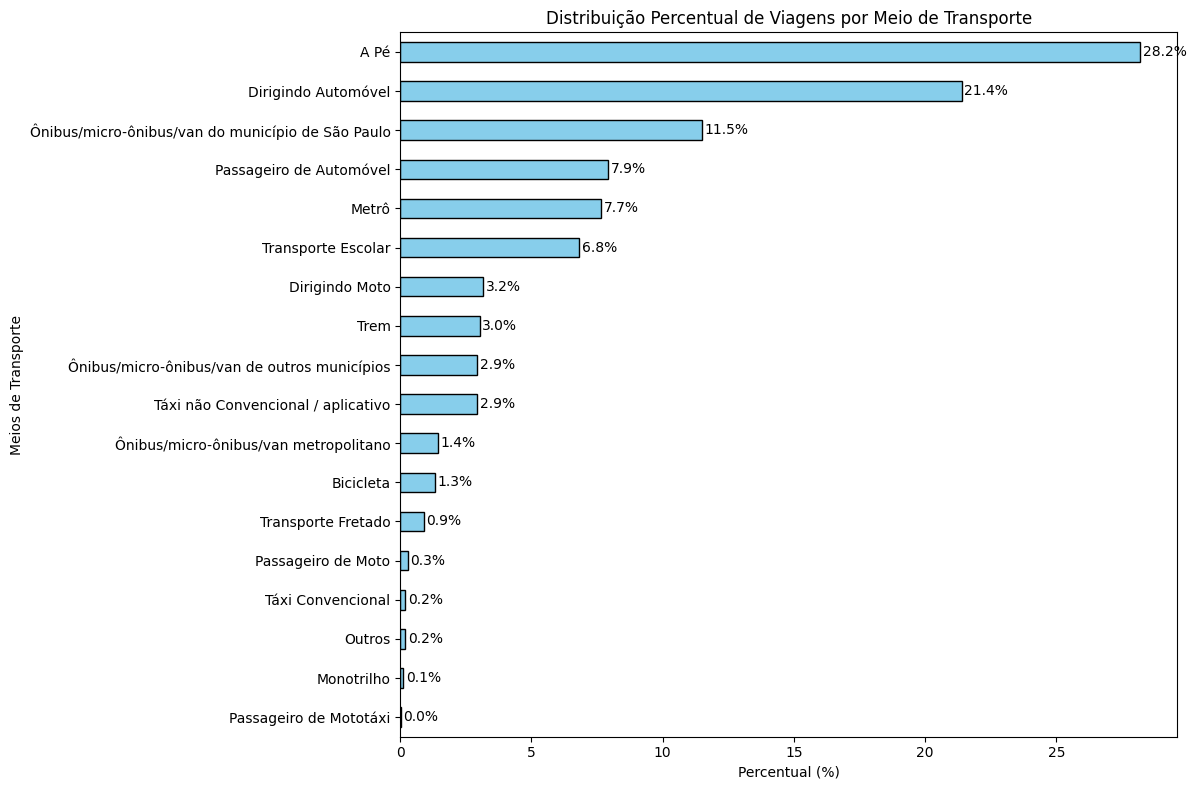

In [509]:
meios_fatorexp_normalizado = (meios_fatorexp / meios_fatorexp.sum()) * 100

plt.figure(figsize=(12, 8))
meios_fatorexp_normalizado.plot(kind='barh', color='skyblue', edgecolor='black')

plt.xlabel('Percentual (%)')
plt.ylabel('Meios de Transporte')
plt.title('Distribuição Percentual de Viagens por Meio de Transporte')

for index, value in enumerate(meios_fatorexp_normalizado):
    plt.text(value + 0.1, index, f'{value:.1f}%', va='center')

plt.tight_layout()
plt.show()

5 meios de transporte mais representativos

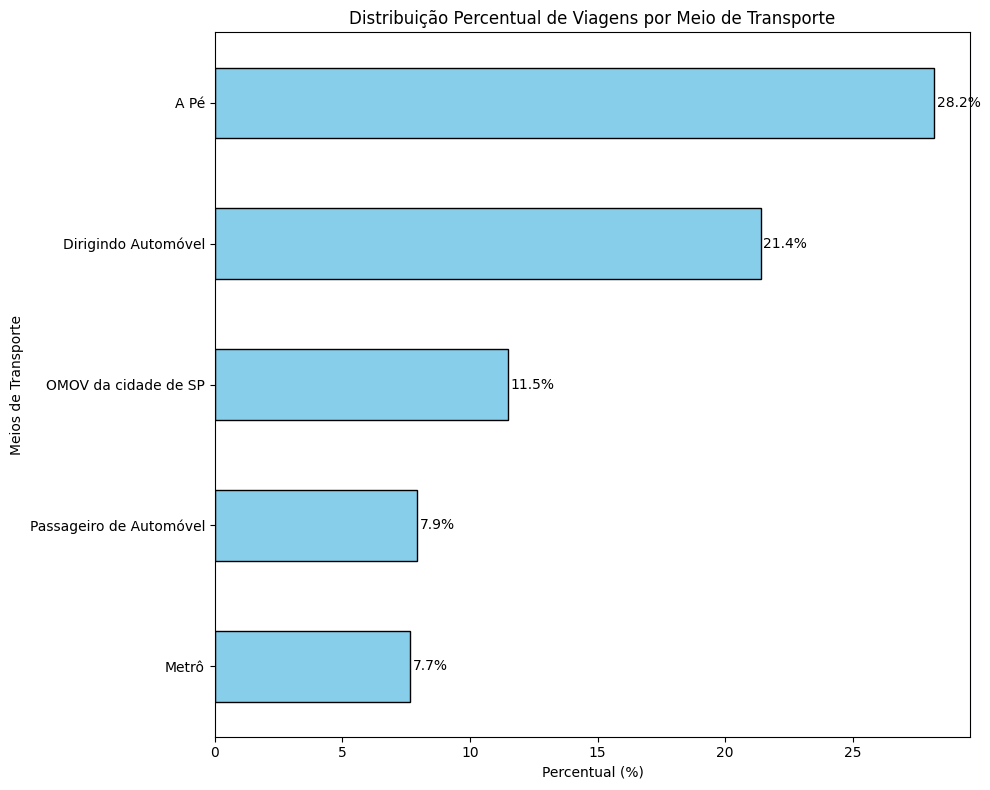

In [510]:
meios_fatorexp_normalizado_head = meios_fatorexp_normalizado.sort_values(ascending=False).head()
meios_fatorexp_normalizado_head = meios_fatorexp_normalizado_head.sort_values(ascending=True)

# Substitua o nome longo pelo nome curto
meios_fatorexp_normalizado_head.index = meios_fatorexp_normalizado_head.index.str.replace(
    "Ônibus/micro-ônibus/van do município de São Paulo", "OMOV da cidade de SP"
)

plt.figure(figsize=(10, 8))

meios_fatorexp_normalizado_head.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Percentual (%)')
plt.ylabel('Meios de Transporte')
plt.title('Distribuição Percentual de Viagens por Meio de Transporte')

for index, value in enumerate(meios_fatorexp_normalizado_head):
    plt.text(value + 0.1, index, f'{value:.1f}%', va='center')

plt.tight_layout()
plt.show()

### Análise comparativa percentual entre os meios de transporte

Com os gráficos acima, observa-se que os meios de transporte mais utilizados são, em ordem decrescente: a pé, dirigindo automóvel, e ônibus(e derivados) do município de São Paulo.

- A pé - 27.7%
- Dirigindo automóvel - 21.0% 
- Ônibus(e derivados) do município de São Paulo - 10.7%

## Caracterização do Perfil do Pedestre

Tabelas de contingência entre sexo e modo de transporte

In [511]:
pd.crosstab(df['SEXO'], df['MODOPRIN'], normalize='index')

MODOPRIN,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
SEXO,,,,,,,,,,,,,,,,,,
1,0.077989,0.022077,0.000677,0.091014,0.017212,0.028313,0.008374,0.052242,0.305686,0.056501,0.00310,0.025818,0.048821,0.001800,0.000125,0.014361,0.243091,0.002797
2,0.087897,0.021851,0.000758,0.129555,0.026926,0.039790,0.004775,0.052689,0.186985,0.095087,0.00548,0.048848,0.004846,0.003084,0.000300,0.002890,0.287341,0.000899
3,0.047619,0.000000,0.000000,0.142857,0.000000,0.023810,0.000000,0.190476,0.095238,0.000000,0.00000,0.190476,0.000000,0.000000,0.000000,0.000000,0.309524,0.000000


Filtrando apenas viagens a pé

In [512]:
# Filtrando pedestres
pedestrians = df.query('MODOPRIN == 17').copy()

### Pré-processamento dos Dados
**Categorização:**
- Faixas etárias
- Distâncias percorridas
- Critério BR
- Sexo
- Raça

In [513]:
# Categorização da distância (em metros)
bins_distancia = [0, 500, 1000, 2000, 5000, float('inf')]
labels_distancia = ['Muito curta (<500m)', 'Curta (500-1000m)', 'Média (1001-2000m)', 
                   'Longa (2001-5000m)', 'Muito longa (>5000m)']

pedestrians['CAT_DISTANCIA'] = pd.cut(pedestrians['DISTANCIA'], bins=bins_distancia, labels=labels_distancia)

In [514]:
# Categorização de idade
bins_idade = [0, 12, 18, 30, 50, 65, 120]
labels_idade = ['Criança (0-12)', 'Adolescente (13-18)', 'Jovem (19-30)', 
               'Adulto (31-50)', 'Adulto 50+ (51-65)', 'Idoso (65+)']

pedestrians['CAT_IDADE'] = pd.cut(pedestrians['IDADE'], bins=bins_idade, labels=labels_idade)

In [515]:
# Mapeamento dos critérios econômicos
pedestrians['CLASSE_ECON'] = pedestrians['CRITERIOBR'].map(criterio_br)
pedestrians['CLASSE_ECON'].value_counts()

CLASSE_ECON
C2     9228
C1     8340
B2     6452
D-E    2433
B1     2243
A      1266
Name: count, dtype: int64

In [516]:
# Mapeamento do sexo
sexo_labels = {1: 'Masculino', 2: 'Feminino'}
pedestrians['SEXO_LABEL'] = pedestrians['SEXO'].map(sexo_labels)

In [517]:
# Mapeamento da raça
raca_labels = {1:"Branca", 2:"Preta", 3:"Amarela", 4:"Parda", 5:"Indígena", 6:"Sem declaração"}
pedestrians['RACA_LABEL'] = pedestrians['RAÇA'].map(raca_labels)

Peso (FE_PESS) total de pedestres

In [518]:
pedestrians_weight = pedestrians['FE_VIA'].sum()

### Análise Descritiva Básica
**Perfil demográfico**
- Distribuição por sexo (SEXO)
- Distribuição por idade (IDADE)
- Distribuição por raça (RAÇA)
- Distribuição por grau de instrução (GRAU_INS)

**Características socioeconômicas**
- Distribuição por condição de atividade (CD_ATIVI)
- Distribuição de renda (VL_REN_I)
- Relação entre renda e modo pedestre

In [519]:
sexo_dist = pedestrians.groupby('SEXO_LABEL')['FE_VIA'].sum() / pedestrians_weight * 100
print("Distribuição por sexo (%):\n", sexo_dist.round(2))

Distribuição por sexo (%):
 SEXO_LABEL
Feminino     56.02
Masculino    43.92
Name: FE_VIA, dtype: float64


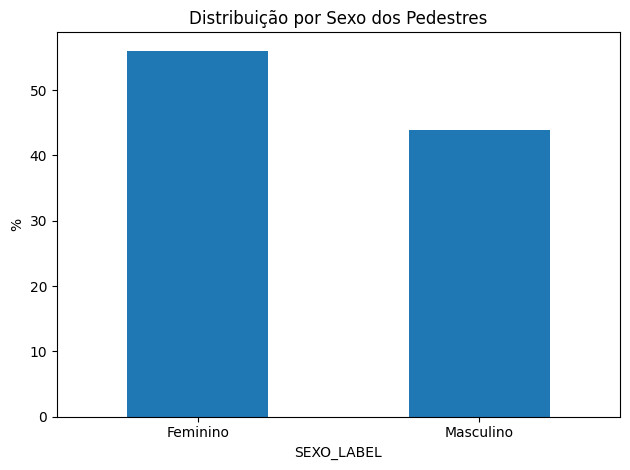

In [520]:
sexo_dist_normalized = sexo_dist / sexo_dist.sum() * 100
sexo_dist_normalized.plot(kind='bar', title='Distribuição por Sexo dos Pedestres', ylabel='%')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [521]:
idade_stats = pedestrians['IDADE'].describe()
print("\nEstatísticas de idade (pedestres):\n", idade_stats.round(2))


Estatísticas de idade (pedestres):
 count    29962.00
mean        32.57
std         20.04
min          1.00
25%         15.00
50%         31.00
75%         48.00
max         95.00
Name: IDADE, dtype: float64


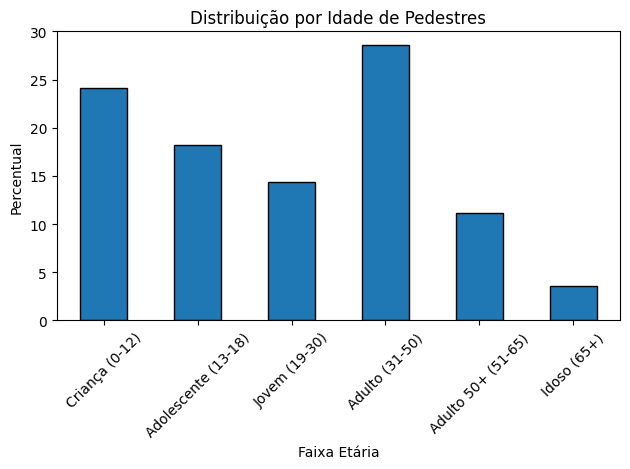

In [522]:
idade_cat_dist = (pedestrians.groupby('CAT_IDADE', observed=False)['FE_VIA'].sum() / pedestrians_weight * 100).reindex(labels_idade)
idade_cat_dist.plot(kind='bar', edgecolor='black')

plt.title('Distribuição por Idade de Pedestres')
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [523]:
print(idade_cat_dist.round(2))

CAT_IDADE
Criança (0-12)         24.10
Adolescente (13-18)    18.22
Jovem (19-30)          14.36
Adulto (31-50)         28.57
Adulto 50+ (51-65)     11.17
Idoso (65+)             3.58
Name: FE_VIA, dtype: float64


In [524]:
raca_dist = pedestrians.groupby('RACA_LABEL')['FE_VIA'].sum() / pedestrians_weight * 100
print("Distribuição por raça (%):\n", raca_dist.round(2))

Distribuição por raça (%):
 RACA_LABEL
Amarela            1.21
Branca            49.01
Indígena           0.29
Parda             38.96
Preta             10.03
Sem declaração     0.50
Name: FE_VIA, dtype: float64


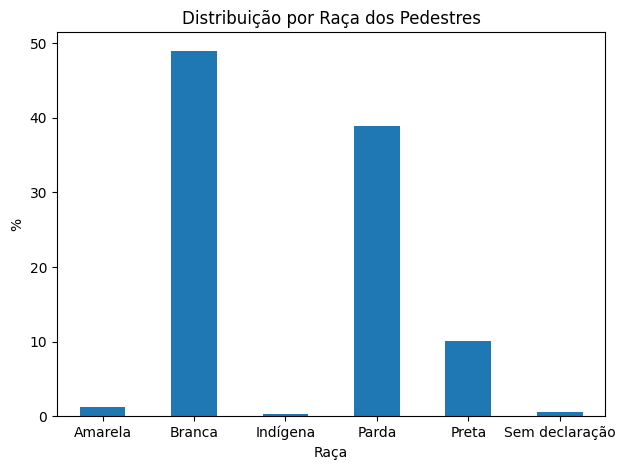

In [525]:
raca_dist_normalized = raca_dist / raca_dist.sum() * 100
raca_dist_normalized.plot(kind='bar', title='Distribuição por Raça dos Pedestres', ylabel='%', xlabel="Raça")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

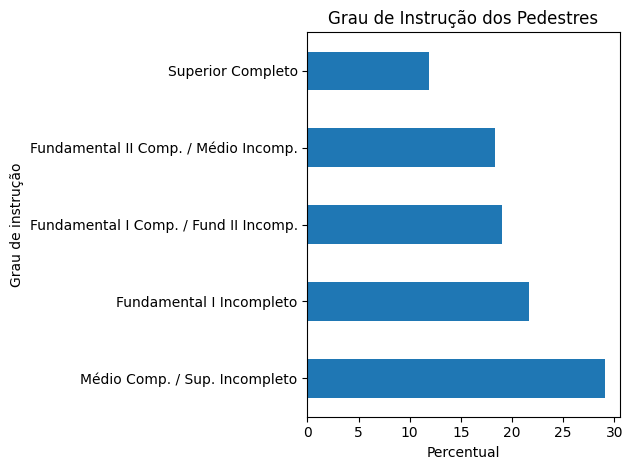

In [526]:
grau_labels = {
    1: 'Fundamental I Incompleto',
    2: 'Fundamental I Comp. / Fund II Incomp.',
    3: 'Fundamental II Comp. / Médio Incomp.',
    4: 'Médio Comp. / Sup. Incompleto',
    5: 'Superior Completo'
}
pedestrians['GRAU_LABEL'] = pedestrians['GRAU_INS'].map(grau_labels)

grau_dist = pedestrians.groupby('GRAU_LABEL')['FE_VIA'].sum()

grau_dist_normalized = grau_dist / grau_dist.sum() * 100

grau_dist_normalized = grau_dist_normalized.sort_values(ascending=False)

grau_dist_normalized.plot(kind='barh', title='Grau de Instrução dos Pedestres', xlabel='Percentual', ylabel='Grau de instrução')
plt.tight_layout()
plt.show()


In [527]:
print(grau_dist_normalized.round(2))

GRAU_LABEL
Médio Comp. / Sup. Incompleto            29.06
Fundamental I Incompleto                 21.68
Fundamental I Comp. / Fund II Incomp.    18.98
Fundamental II Comp. / Médio Incomp.     18.36
Superior Completo                        11.92
Name: FE_VIA, dtype: float64


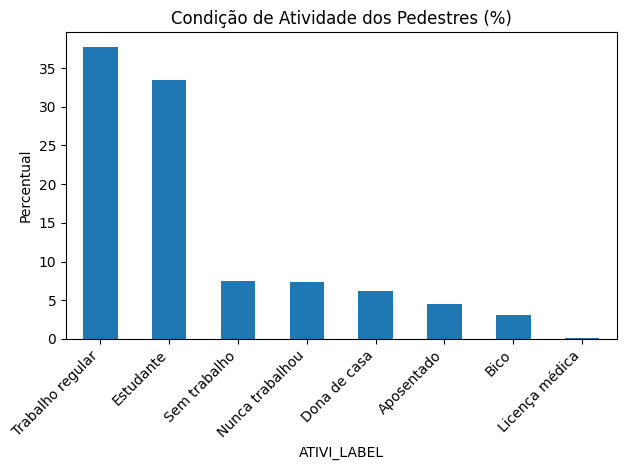

In [528]:
atividade_labels = {
    1: 'Trabalho regular',
    2: 'Bico',
    3: 'Licença médica',
    4: 'Aposentado',
    5: 'Sem trabalho',
    6: 'Nunca trabalhou',
    7: 'Dona de casa',
    8: 'Estudante'
}
pedestrians['ATIVI_LABEL'] = pedestrians['CD_ATIVI'].map(atividade_labels)

ativi_dist = pedestrians.groupby('ATIVI_LABEL')['FE_VIA'].sum()

ativi_dist_normalized = ativi_dist / ativi_dist.sum() * 100

ativi_dist_normalized = ativi_dist_normalized.sort_values(ascending=False)

ativi_dist_normalized.plot(kind='bar', title='Condição de Atividade dos Pedestres (%)', ylabel='Percentual')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [529]:
print(ativi_dist_normalized.round(2))

ATIVI_LABEL
Trabalho regular    37.73
Estudante           33.48
Sem trabalho         7.47
Nunca trabalhou      7.38
Dona de casa         6.23
Aposentado           4.47
Bico                 3.13
Licença médica       0.10
Name: FE_VIA, dtype: float64


In [530]:
renda_stats = pedestrians['VL_REN_I'].describe()
p95_renda_stats = pedestrians['VL_REN_I'].quantile(0.95)
print("\nEstatísticas da renda individual (pedestres):\n", renda_stats.round(2))


Estatísticas da renda individual (pedestres):
 count    21733.00
mean      1643.54
std       3934.72
min          0.00
25%          0.00
50%          0.00
75%       1900.00
max      90000.00
Name: VL_REN_I, dtype: float64


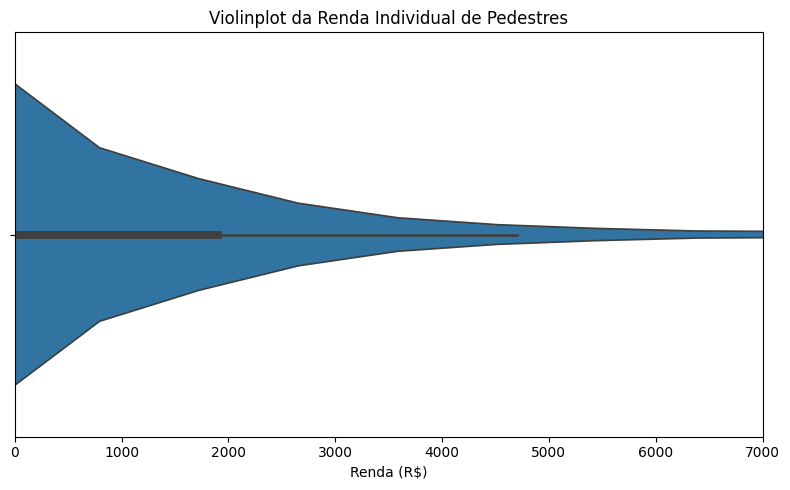

In [531]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=pedestrians, x='VL_REN_I')
plt.title('Violinplot da Renda Individual de Pedestres')
plt.xlabel('Renda (R$)')
plt.xlim(0, p95_renda_stats)
plt.tight_layout()
plt.show()

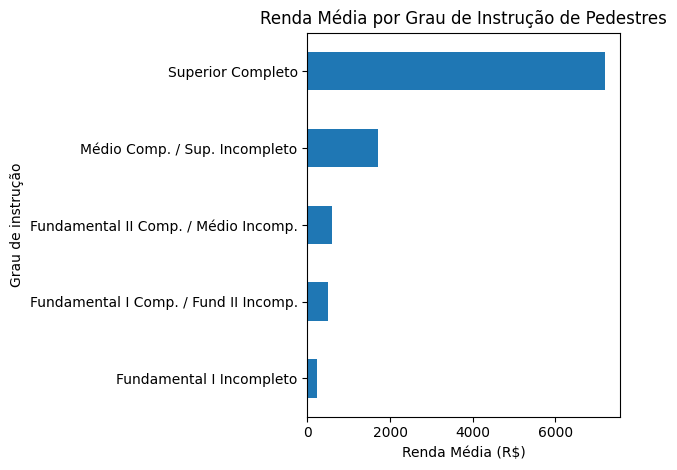

In [532]:
renda_grau = pedestrians.groupby('GRAU_LABEL')['VL_REN_I'].mean().sort_values()
renda_grau.plot(kind='barh', title='Renda Média por Grau de Instrução de Pedestres', xlabel='Renda Média (R$)', ylabel='Grau de instrução')
plt.tight_layout()
plt.show()

In [533]:
print(renda_grau.round(2))

GRAU_LABEL
Fundamental I Incompleto                  236.60
Fundamental I Comp. / Fund II Incomp.     493.90
Fundamental II Comp. / Médio Incomp.      604.93
Médio Comp. / Sup. Incompleto            1718.64
Superior Completo                        7203.04
Name: VL_REN_I, dtype: float64


**Sumário - Análise do perfil demográfico dos pedestres**
1. Distribuição por Sexo
- *Feminino*: 56,02%
- *Masculino*: 43,92%

2. Distribuição por Faixa Etária
- Idade média: 32,5 ano
- Mediana (Q2): 31 anos
- Faixa etária predominante: *31 a 50 anos*, com 28,57%
- Segunda maior faixa: *0 a 12 anos*, com 24,10%
- Menor faixa: *65 anos ou mais*, representando apenas 3,58%

3. Distribuição por Raça/Cor
- *Branca*: 49,01% (maior proporção)
- *Parda*: 38,96%
- *Preta*: 10,03%
- *Amarela*: 1,21%
- *Indígena*: 0,29% (menor proporção)

4. Distribuição por Grau de Instrução
- Faixa predominante: *Ensino médio completo ou superior incompleto* (29,06%)
- Faixa menos representada: *Superior completo* (11,92%)

5. Distribuição por Condição de Atividade
- Principal grupo: Pessoas com trabalho regular (37,73%)
- Segundo maior grupo: Estudantes (33,48%)

6. Distribuição da Renda Individual
- Renda média: R$ 1.643,54
- 3º quartil (Q3): R$ 1.900,00

7. Renda Individual Média por Grau de Instrução (Q95)
- *Superior completo*: R$ 7.203,04
- *Médio completo / Superior incompleto*: R$ 1.718,64

### Análise Específica do Comportamento como Pedestre
**Motivações**
- Razões para caminhar (PE_BICI)
- Motivos de viagem (MOTIVO_D)

**Padrões de deslocamento**
- Distribuição de distâncias percorridas (DISTANCIA)
- Relação entre distância e motivo da viagem (MOTIVO_D)
- Relação entre distância e características demográficas

**Análise da Escolha pelo Meio A Pé (PE_BICI)**

In [534]:
pe_bici_labels = {1:"Pequena distância", 2:"Condução cara", 3:"Ponto/Estação distante", 4:"Condução demora para passar", 5:"Viagem demorada", 6:"Condução lotada", 7:"Atividade física", 8:"Medo de contágio", 9:"Outros motivos"}
pedestrians["PE_BICI_LABEL"] = pedestrians["PE_BICI"].map(pe_bici_labels)

In [535]:
pe_bici_dist = pedestrians.groupby('PE_BICI_LABEL')['FE_VIA'].sum() / pedestrians_weight * 100
print("Distribuição por PE_BICI (%):\n", pe_bici_dist.round(2))

Distribuição por PE_BICI (%):
 PE_BICI_LABEL
Atividade física                1.68
Condução cara                   2.33
Condução demora para passar     0.70
Condução lotada                 0.12
Medo de contágio                0.01
Outros motivos                  0.81
Pequena distância              93.75
Ponto/Estação distante          0.46
Viagem demorada                 0.13
Name: FE_VIA, dtype: float64


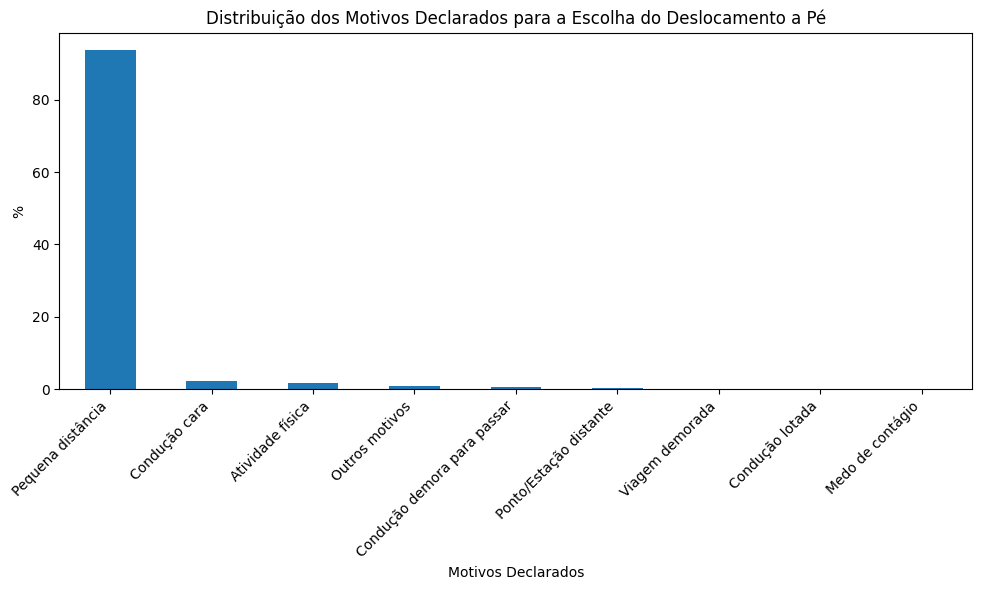

In [536]:
pe_bici_dist_normalized = pe_bici_dist / pe_bici_dist.sum() * 100
pe_bici_dist_normalized = pe_bici_dist_normalized.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
pe_bici_dist_normalized.plot(
    kind='bar',
    title='Distribuição dos Motivos Declarados para a Escolha do Deslocamento a Pé',
    ylabel='%',
    xlabel="Motivos Declarados"
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

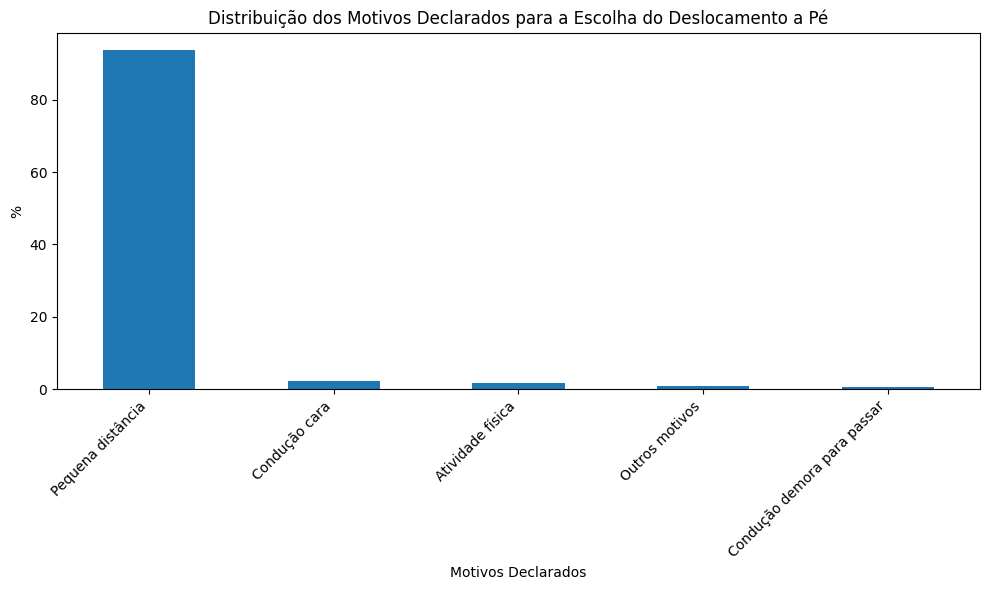

In [537]:
pe_bici_dist_normalized_head = pe_bici_dist_normalized.sort_values(ascending=False).head()
pe_bici_dist_normalized_head = pe_bici_dist_normalized_head.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
pe_bici_dist_normalized_head.plot(
    kind='bar',
    title='Distribuição dos Motivos Declarados para a Escolha do Deslocamento a Pé',
    ylabel='%',
    xlabel="Motivos Declarados"
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Distribuição dos Motivos de deslocamento ao Destino (MOTIVO_D)**

In [538]:
motivo_labels = {1:"Trabalho Indústria", 2:"Trabalho Comércio", 3:"Trabalho Serviços", 4:"Escola/Educação", 5:"Compras", 6:"Médico/Dentista/Saúde", 7:"Recreação/Visitas/Lazer", 8:"Residência", 9:"Procurar Emprego", 10:"Assuntos Pessoais", 11:"Refeição"
}
pedestrians["MOTIVO_LABEL"] = pedestrians["MOTIVO_D"].map(motivo_labels)

In [539]:
motivo_d_dist = pedestrians.groupby('MOTIVO_LABEL')['FE_VIA'].sum() / pedestrians_weight * 100
motivo_d_dist = motivo_d_dist.sort_values(ascending=False)

print("Distribuição por motivo de deslocamento ao destino (%):\n", motivo_d_dist.round(2))

Distribuição por motivo de deslocamento ao destino (%):
 MOTIVO_LABEL
Residência                 47.39
Escola/Educação            30.31
Trabalho Serviços           8.70
Trabalho Comércio           3.76
Trabalho Indústria          2.25
Compras                     2.02
Refeição                    1.86
Recreação/Visitas/Lazer     1.40
Assuntos Pessoais           1.30
Médico/Dentista/Saúde       1.00
Procurar Emprego            0.02
Name: FE_VIA, dtype: float64


In [540]:
# agrupando setores de trabalho (serviços, comércio, indústria)
work_value = motivo_d_dist[['Trabalho Indústria', 'Trabalho Comércio', 'Trabalho Serviços']].sum() 
print(f"Soma do setores de trabalho: {work_value.round(2)}")

Soma do setores de trabalho: 14.71


In [541]:
motivo_d_dist = motivo_d_dist.drop(['Trabalho Indústria', 'Trabalho Comércio', 'Trabalho Serviços']) # remove setores de trabalho
motivo_d_dist['Trabalho'] = work_value # adiciona trabalho como setor unificado

In [542]:
motivo_d_dist = motivo_d_dist.sort_values(ascending=False) # ordenando por ordem decrescente

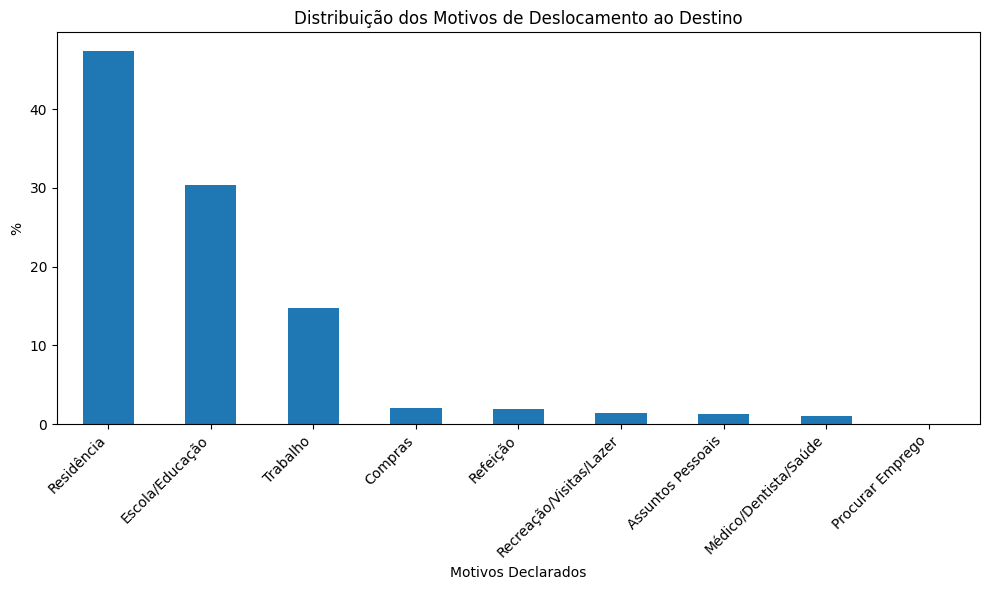

In [543]:
motivo_d_dist_normalized = motivo_d_dist / motivo_d_dist.sum() * 100
motivo_d_dist_normalized = motivo_d_dist_normalized

plt.figure(figsize=(10, 6))
motivo_d_dist_normalized.plot(
    kind='bar',
    title='Distribuição dos Motivos de Deslocamento ao Destino',
    ylabel='%',
    xlabel="Motivos Declarados"
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Distribuição de distâncias percorridas (DISTANCIA)**

In [544]:
distancia_distribution = pedestrians.groupby('CAT_DISTANCIA', observed=False)['FE_VIA'].sum() / pedestrians_weight * 100
print("Distribuição por motivo de deslocamento ao destino (%):\n", distancia_distribution.round(2))

Distribuição por motivo de deslocamento ao destino (%):
 CAT_DISTANCIA
Muito curta (<500m)     55.42
Curta (500-1000m)       28.44
Média (1001-2000m)      12.33
Longa (2001-5000m)       3.01
Muito longa (>5000m)     0.80
Name: FE_VIA, dtype: float64


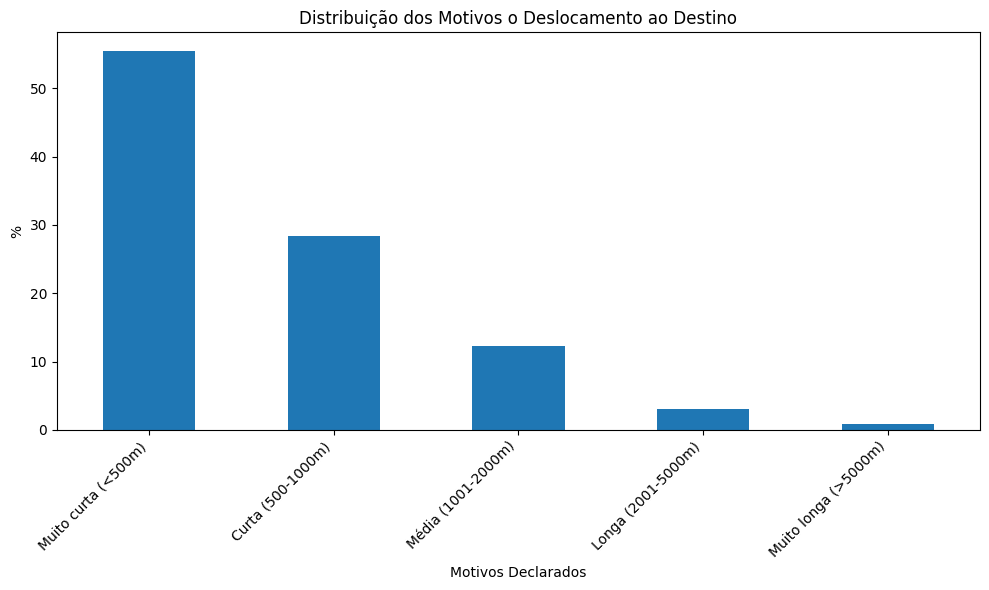

In [545]:
distancia_distribution_normalized = distancia_distribution / distancia_distribution.sum() * 100
distancia_distribution_normalized = distancia_distribution_normalized.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
distancia_distribution_normalized.plot(
    kind='bar',
    title='Distribuição dos Motivos o Deslocamento ao Destino',
    ylabel='%',
    xlabel="Motivos Declarados"
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Relação entre distância e motivo da viagem**

In [546]:
distancia_motivo = pedestrians.groupby('MOTIVO_LABEL')['DISTANCIA'].mean().sort_values(ascending=False)
print(distancia_motivo.round(2))

MOTIVO_LABEL
Procurar Emprego           1306.41
Recreação/Visitas/Lazer    1041.03
Médico/Dentista/Saúde       946.05
Assuntos Pessoais           933.43
Compras                     915.09
Trabalho Indústria          819.88
Residência                  785.62
Trabalho Serviços           785.37
Trabalho Comércio           748.99
Escola/Educação             704.99
Refeição                    513.80
Name: DISTANCIA, dtype: float64


In [547]:
# agrupando setores de trabalho (serviços, comércio, indústria)
work_value = distancia_motivo[['Trabalho Indústria', 'Trabalho Comércio', 'Trabalho Serviços']].mean() 
print(f"Soma do setores de trabalho: {work_value.round(2)}")

Soma do setores de trabalho: 784.75


In [548]:
distancia_motivo = distancia_motivo.drop(['Trabalho Indústria', 'Trabalho Comércio', 'Trabalho Serviços']) # remove setores de trabalho
distancia_motivo['Trabalho'] = work_value # adiciona trabalho como setor unificado

In [549]:
distancia_motivo = distancia_motivo.sort_values(ascending=False) # ordenando por ordem decrescente

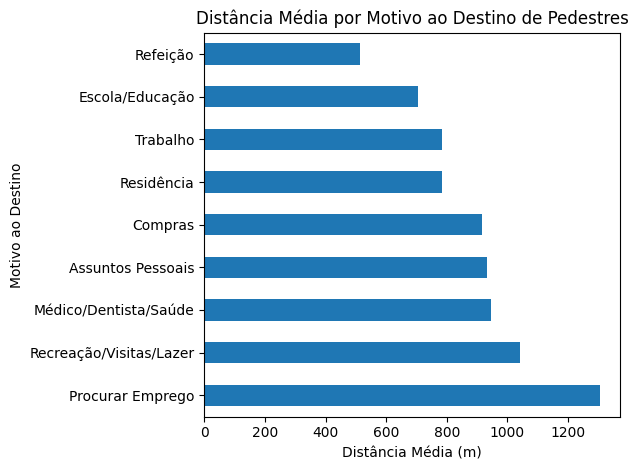

In [550]:
distancia_motivo.plot(kind='barh', title='Distância Média por Motivo ao Destino de Pedestres', xlabel='Distância Média (m)', ylabel="Motivo ao Destino")
plt.tight_layout()
plt.show()

**Sumário - Análise comportamental do pedestre**
1. Distribuição dos Motivos para a Escolha do Deslocamento a Pé
- Motivo mais frequente: *Pequena distância* (93,75%)
- Segundo motivo mais frequente: *Condução cara* (2,33%)

2. Distribuição dos Motivos de Destino dos Pedestres
- Destino mais comum: *Residência* (47,39%)
- Segundo mais comum: *Educação* (30,31%)
- Terceiro mais comum: *Trabalho* (14,71%)

3. Distribuição da Distância Percorrida pelos Pedestres
- Faixa mais frequente: *Menor que 500 metros* (55,42%)
- Segunda faixa mais frequente: *Entre 500m e 1000m* (28,44%)

4. Relação entre a Distância Percorrida e o Motivo da Viagem
- Maior distância média: *Procurar emprego* (~1300 metros)
- Menor distância média: *Refeição* (~510 metros)